In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pandas as pd
from itertools import groupby

path_models='models/'
path_predictions='predictions/'
path_data='Sentinel2LULC_354/'
path_test='Test 2/'

In [35]:
labels = []
labelnames = []
ghm = []
prob = []

for d in os.listdir(path_data):
    lab = int(d.split('_')[0])
    labelname = str(lab) + '. ' + re.search('_+([a-zA-Z]+)_+', d).group(1)
    for f in os.listdir(path_data + d):
        labels.append(lab)
        labelnames.append(labelname)
        other_data = re.search('^\d{1,2}_+[A-Za-z]+_+([0-9.%]+)_+\d+_+([0-9.%]+)_+', f)
        try:
            prob.append(float(other_data.group(1).replace('%','')))
        except:
            prob.append(np.mean(prob) if len(prob)>0 else 100.0)
        try:
            ghm.append(float(other_data.group(2).replace('%','')))
        except:
            ghm.append(np.mean(ghm) if len(ghm)>0 else 50.0)


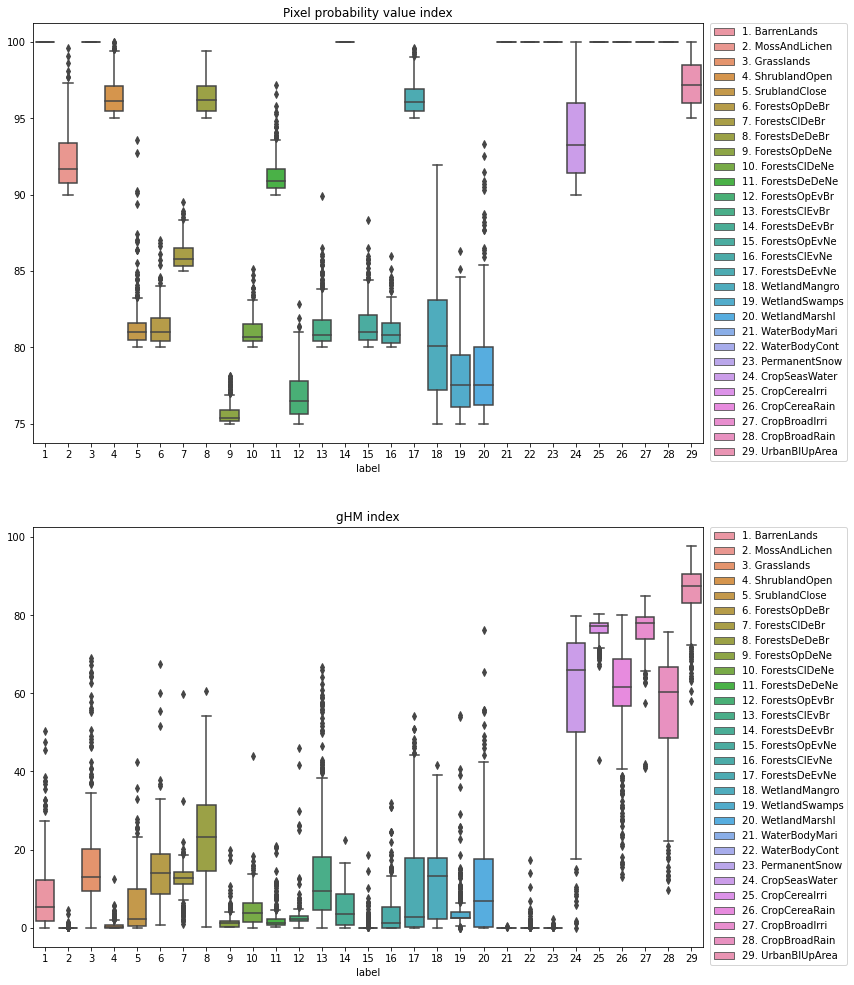

In [36]:
train = pd.DataFrame({'prob index': prob, 'ghm index': ghm, 'label': labels, 'class': labelnames}).sort_values('label')

fig, ax = plt.subplots(2,1,figsize=(12,17))
im = sns.boxplot(ax=ax[0], x='label', y='prob index', hue='class', data=train, dodge=False)
ax[0].set_ylabel('')
ax[0].title.set_text('Pixel probability value index')
ax[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
im = sns.boxplot(ax=ax[1], x='label', y='ghm index', hue='class', data=train, dodge=False)
ax[1].set_ylabel('')
ax[1].title.set_text('gHM index')
ax[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()